In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree
import matplotlib.pyplot as plt



In [2]:
# Muat dataset
wine = load_wine()

# Konversi dataset ke dalam DataFrame pandas
df = pd.DataFrame(data=np.c_[wine['data'], wine['target']], columns=wine['feature_names'] + ['target'])

# Pisahkan fitur dan target
X = df.drop('target', axis=1)
y = df['target']

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:
# Inisialisasi dan latih model pohon keputusan
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)


DecisionTreeClassifier()

Akurasi: 0.9444444444444444

Laporan Klasifikasi:
              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93        14
         1.0       0.93      1.00      0.97        14
         2.0       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.95      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36



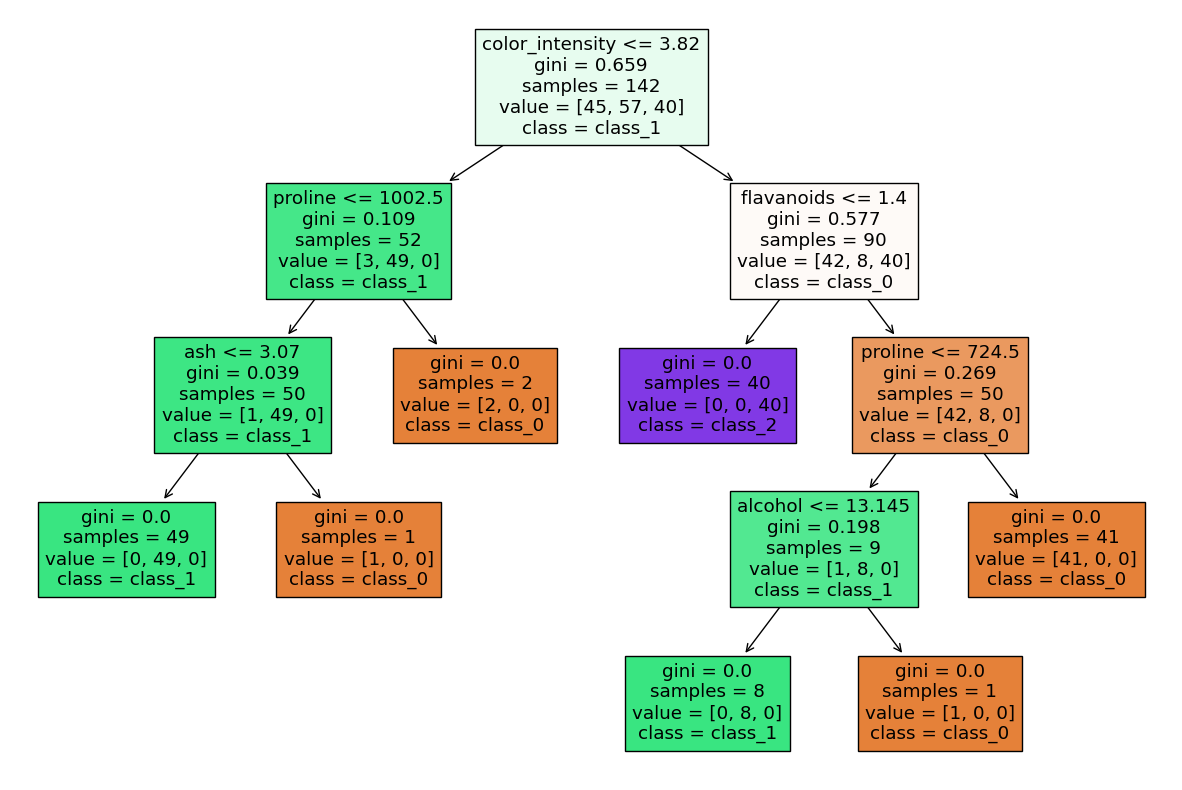

In [9]:
# Prediksi kelas untuk data uji
y_pred = clf.predict(X_test)

# Evaluasi akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)

# Laporan klasifikasi
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred))

# Visualisasi pohon keputusan
plt.figure(figsize=(15,10))
tree.plot_tree(clf, filled=True, feature_names=wine.feature_names, class_names=wine.target_names)
plt.show()



In [10]:
# Menghitung metrik tambahan
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Prediksi pada data uji
y_pred = clf.predict(X_test)

# Menghitung metrik evaluasi
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Menghitung specificity dari confusion matrix
cm = confusion_matrix(y_test, y_pred)
specificity = cm[1,1] / (cm[1,0] + cm[1,1]) if (cm.shape[0] > 1) else 0

# Menampilkan hasil evaluasi
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"F1 Score: {f1:.4f}")


Accuracy: 0.9444
Precision: 0.9540
Recall: 0.9345
Specificity: 1.0000
F1 Score: 0.9425
